In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn import metrics

In [3]:
data = pd.read_csv("C:/Users/Witek/PycharmProjects/test/Coursera/House price prediction/kc_house_train_data.csv")
data_model = data

In [4]:
del data_model['id']
del data_model['date']

x_train, x_test, x_validate = np.split(data_model.sample(frac=1), [int(.6*len(data_model)), int(.8*len(data_model))])

#y_train = x_train["price"]
#del x_train["price"]

In [5]:
x_train.columns.tolist()

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

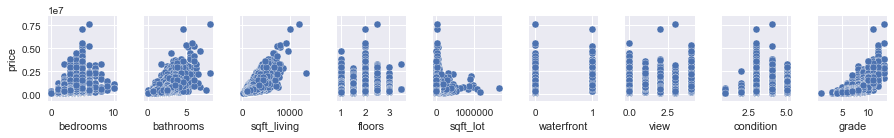

In [6]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['bedrooms','bathrooms','sqft_living', 'floors', 'sqft_lot', 'waterfront','view','condition','grade'], y_vars='price', size=2, aspect=0.7)

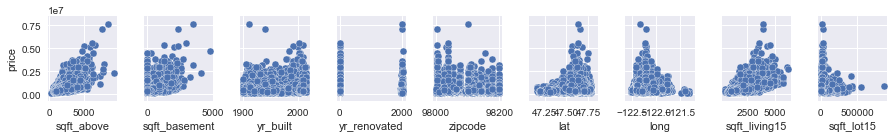

In [7]:
sns.pairplot(data, x_vars=['sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15'], y_vars='price', size=2, aspect=0.7)

In [8]:
lm1 = smf.ols(formula='price ~ bedrooms+ bathrooms + sqft_living + sqft_lot + floors + waterfront + view +condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15', data=x_train).fit()

In [9]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     1464.
Date:                Sun, 29 Oct 2017   Prob (F-statistic):               0.00
Time:                        14:39:08   Log-Likelihood:            -1.4246e+05
No. Observations:               10430   AIC:                         2.850e+05
Df Residuals:                   10412   BIC:                         2.851e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.025e+07   4.33e+06      2.364      0.018    1.75e+06    1.87e+07
bedrooms      -4.366e+04   2912.883    -14.990      0.000   -4.94e+04    -3.8e+04
bathrooms      4.592e+04   4799.732      9.566      0.000    3.65e+04    5.53e+04
sqft_living     119.6704      3.336     35.868      0.000     113.130     126.210
sqft_lot          0.1377      0.069      2.004      0.045       0.003       0.272
floors           40.2158   5307.787      0.008      0.994   -1.04e+04    1.04e+04
waterfront     6.354e+05   2.54e+04     24.990      0.000    5.86e+05    6.85e+05
view           4.565e+04   3160.929     14.441      0.000    3.95e+04    5.18e+04
condition      2.606e+04   3477.700      7.495      0.000    1.92e+04    3.29e+04
grade          9.826e+04   3150.826     31.186      0.000    9.21e+04    1.04e+05
sqft_above       78.4884      3.341     23.491      0.000      71.939      85.038
sqft_basement    41.1812      3.925     10.492      0.000      33.487      48.875
yr_built      -2850.1071    107.757    -26.449      0.000   -3061.332   -2638.882
yr_renovated     24.4758      5.493      4.456      0.000      13.708      35.243
zipcode        -644.6738     48.748    -13.225      0.000    -740.229    -549.119
lat            5.952e+05   1.58e+04     37.578      0.000    5.64e+05    6.26e+05
long          -2.422e+05   1.93e+04    -12.539      0.000    -2.8e+05   -2.04e+05
sqft_living15    14.8738      5.078      2.929      0.003       4.921      24.827
sqft_lot15       -0.5417      0.113     -4.788      0.000      -0.763      -0.320
==============================================================================
Omnibus:                     9071.727   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           960761.727
Skew:                           3.674   Prob(JB):                         0.00
Kurtosis:                      49.441   Cond. No.                     2.19e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [10]:
y_test_pred = lm1.predict(x_test)

In [11]:
MAE = metrics.mean_absolute_error(x_test["price"], y_test_pred)
RMSE = np.sqrt(metrics.mean_squared_error(x_test["price"], y_test_pred))

In [12]:
fig_size = [15,9]
plt.rcParams["figure.figsize"] = fig_size

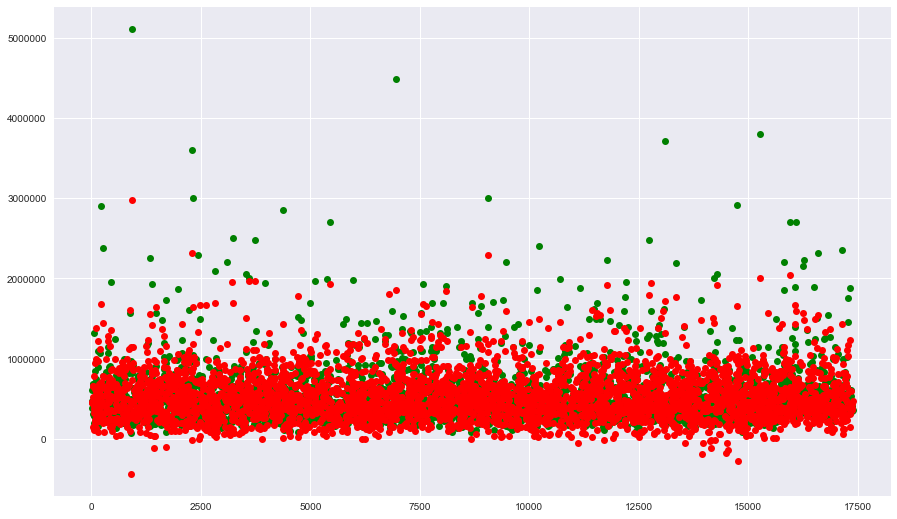

In [13]:
plt.plot(x_test["price"], 'og')
plt.plot(y_test_pred, 'or')

In [14]:
relative_error = (y_test_pred - x_test["price"]) /x_test["price"]

(-0.8, 0.9)

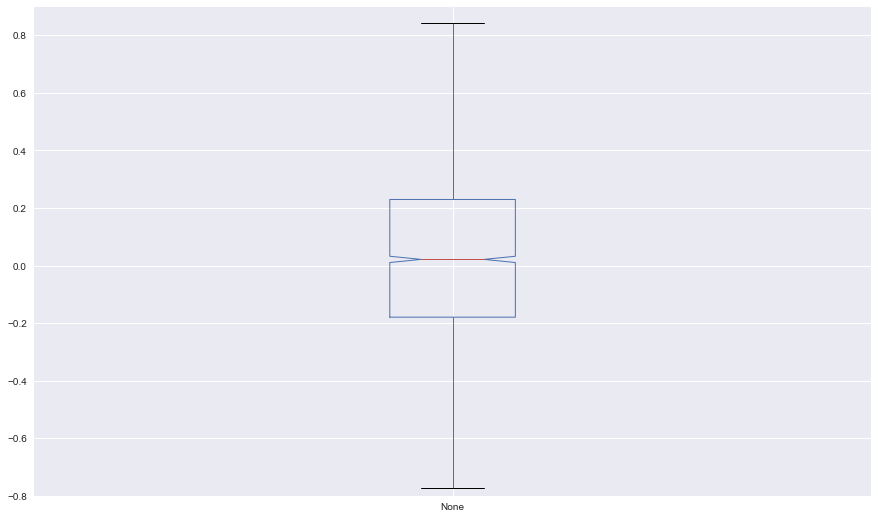

In [15]:
box = relative_error.plot.box(notch=True)
box.set_ylim(-0.8,0.9)

In [16]:
sum((y_test_pred - x_test["price"]) ** 2)

138833164748875.31